## Perceptron with decision boundary

In [33]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('hw3data', sep="\t", header=None)
x = np.hstack((np.ones((data.shape[0], 1)), data.drop(data.columns[2], axis=1)))
y = data[2]
y.head()
# Convert Class-1 and Class-2 into 0's and 1's
for i, val in enumerate(y):
    if val == "Class-1":
        y[i] = 0
    else:
        y[i] = 1

/Users/neeraj/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/neeraj/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [35]:
# Method to split data into 70% Train and 30% Test data
def split_data(df, X, Y):
    arr_rand = np.random.rand(df.shape[0])
    split = arr_rand < np.percentile(arr_rand, 70)
    
    X_train = X[split]
    Y_train = Y[split]
    X_test =  X[~split]
    Y_test = Y[~split]

    return X_train, Y_train, X_test, Y_test

In [36]:
# Splitting the data
X_train, Y_train, X_test, Y_test = split_data(data, x, y)   

In [37]:
# Sigmoid activation function
def activation_func(value):
    return (1 / (1 + np.exp(-value)))

In [38]:
# Function to return mea squared error
def mse(y_predicted, Y_test):
    return np.sum((y_predicted - Y_test) ** 2) / len(y_predicted)

In [39]:
# Derivative of sigmoid function
def sigmoid_derivative(val):
    return activation_func(val) * (1 - activation_func(val))

In [40]:
# Custom evaluate function to get the predicted value of Y using the sigmoid activation
def evaluate(theta, X_test, Y_test):
    y_predicted = activation_func(np.dot(X_test, theta))
    y_predicted = y_predicted.reshape(y_predicted.shape[0])
    
    # Calculating the test error
    test_error = mse(y_predicted, Y_test)
    
    # Updating y values with 0's and 1's
    for i, val in enumerate(y_predicted):
        if val >= 0.5:
            y_predicted[i] = 1
        else:
            y_predicted[i] = 0
            
    ctr = 0   
    Y_test = np.array(Y_test)
    # Counting the matched value count
    for i, val in enumerate(y_predicted):
        if y_predicted[i] == Y_test[i]:
            ctr += 1
    # Number of values matched
    print('CORRECT', ctr)
    accuracy = (ctr / len(Y_test)) * 100
    
    return y_predicted, accuracy, test_error

In [41]:
# Model to train the perceptron using delta rule
def perceptron_train(x, y, alpha, iterations):
    # converting into numpy
    X = np.array(x)
    # dtype is a numpy.object, converting the array into astype(float)
    # otherwise it will show a message saying numpy.float64 has no attribute log10
    X = X.astype(float) 
    n = X.shape[0]
    Y = np.array(y).reshape(n, 1)
    Y = Y.astype(float) 
    
    # Randomly initialising random weights 
    # weights = [L-1, L] where L-1 => no of neurons in prev layer, L => neurons in current neurons
    weights = np.random.random((X.shape[1], 1))
    weights = weights.reshape(3, 1)
    
    # Final arr to include all errors
    loss_arr = []
    
    # Looping over through for N iterations
    for i in range(iterations):
        # Calcuating the predicted values of Y
        z = np.dot(X, weights)
        y_predicted = activation_func(z)
        
        # Calucating mean squared loss
        loss_j = mse(y_predicted, Y)

        # Delta rule implementation
        weights = weights - alpha * np.dot(np.transpose(X), (sigmoid_derivative(y_predicted) * (y_predicted - Y))) 
       
        # Append the loss error to the final array
        loss_arr.append(loss_j) 
    return (weights, loss_arr)

weights, loss_arr = perceptron_train(X_train, Y_train, 0.001, 10000)
        

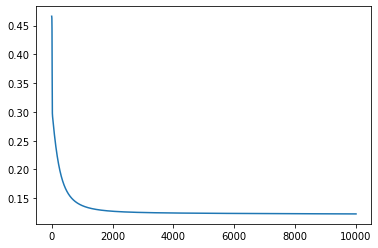

In [42]:
# Plotting the graph for the loss J decreases over time
x_arr = np.arange(0,10000,1)
loss_arr = np.array(loss_arr)
plt.plot(x_arr, loss_arr)

In [43]:
# Training error 
print('Training error: ', loss_arr.mean() * 100, "%")

Training error:  13.052054076499504 %


In [44]:
# Calculating the accuracy, test error
y_predicted, accuracy, test_error  = evaluate(weights, X_test, Y_test)
print('Accuracy: ', accuracy)
print('Test Error: ', test_error * 100, "%" )

CORRECT 39
Accuracy:  86.66666666666667
Test Error:  11.335498865921947 %


In [45]:
# Method to plot the decision boundary 

# Get the transpose of the weights
weights = np.transpose(weights)

# Update the X, Y values 
X = np.array(x)
X = X.astype(float) 
n = X.shape[0]
Y = np.array(y).reshape(n, 1)
Y = Y.astype(float)     

In [46]:
# Linear decision boundary in the input space
a = np.linspace(np.amin(X[:, 1]), np.amax(X[:, 1]), num=200)
b = np.array([])

for i in range(a.shape[0]):
    c = -(weights[0, 1] / weights[0, 2]) * a[i] - weights[0, 0] / weights[0, 2]
    b = np.append(b, np.array([c]))

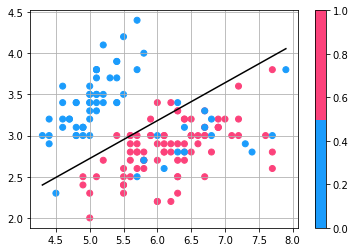

In [47]:
# Plot the scatter points and decision boundary
colors=['#1B9CFC', '#FC427B']
plt.scatter(X[:, 1], X[:, 2], c=Y[:,0], cmap=matplotlib.colors.ListedColormap(colors))
plt.plot(a, b, 'black')
plt.grid(True)
plt.colorbar()
plt.show()